# Question 1
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [210]:
import pandas as pd
import numpy as np

# 2019 Winter Data Scienece Intern Challenge Data Set was exported from the Google Sheets link as data.csv
data = pd.read_csv('data.csv', index_col = 0)
data['created_at'] = pd.to_datetime(data['created_at'])

In [211]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

<AxesSubplot:title={'center':'Order Amount vs Order Date for Shopify Shoe Stores'}, xlabel='Order Date', ylabel='Order Amount ($)'>

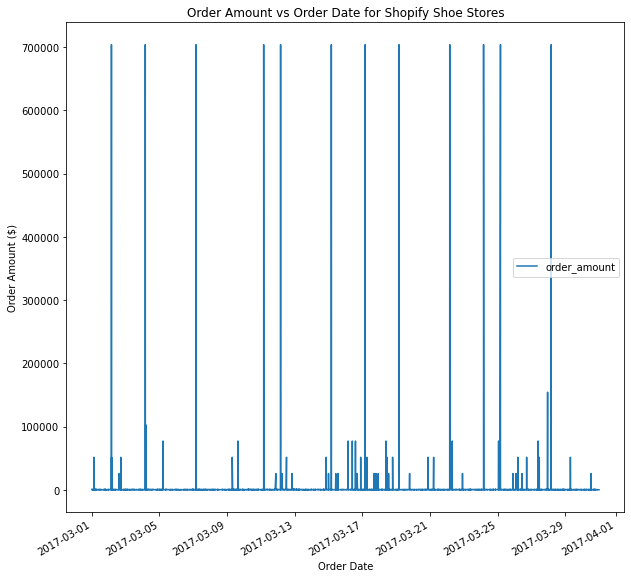

In [212]:
data.plot(x='created_at', y='order_amount', figsize=[10,10], xlabel='Order Date', ylabel='Order Amount ($)', title='Order Amount vs Order Date for Shopify Shoe Stores')

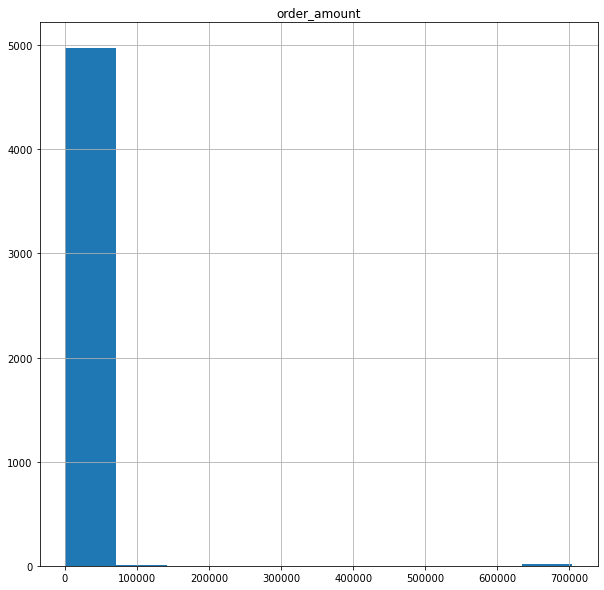

In [213]:
hist = data.hist(column='order_amount', bins=10, figsize=[10,10])

This shows what went wrong with the naive calculation. The AOV is the mean of the orders for the period, and there exist a small amount of orders that are orders of magnitude higher than the majority of the orders.

A better way of evaluating this data would be a method that reduces the impact of these outliers without affecting the rest of the data. With this in mind, we will avoid any type of data normalization/scaling.

Lets plot the AOV per shop and see if we can target where these outliers come from.

<AxesSubplot:title={'center':'Average Order Value vs Shop ID for Shopify Shoe Stores'}, xlabel='Shop ID', ylabel='Average Order Value ($)'>

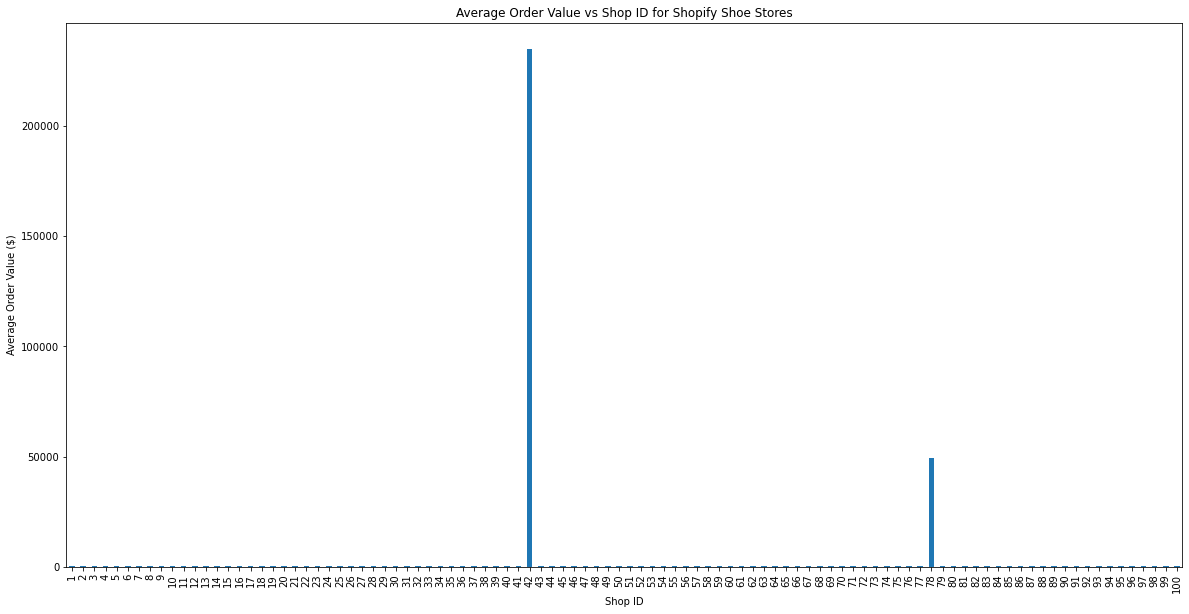

In [214]:
shops = data.groupby('shop_id')['order_amount'].mean()
shops
shops.plot(kind='bar', figsize=[20,10], xlabel='Shop ID', ylabel='Average Order Value ($)', title='Average Order Value vs Shop ID for Shopify Shoe Stores')

This shows that Shop 42 and 78 are solely responsible for all of the outliers. A simple method of cleaning the data would be to remove these stores from the dataset before taking the AOV.

In [215]:
data_drop_shops = data.drop(data[(data['shop_id'] == 78) | (data['shop_id'] == 42)].index)
data_drop_shops['order_amount'].describe()

count    4903.000000
mean      300.155823
std       155.941112
min        90.000000
25%       163.000000
50%       284.000000
75%       386.500000
max      1086.000000
Name: order_amount, dtype: float64

We drop 97 records and end up with an AOV ovf $300.16, which is closer in line with what we might have initially expected.

Lets investigate the data further to see why these two outliers occured.

We will first try looking at the data when sorted by total items purchased in a transaction.

In [216]:
data.sort_values('total_items', ascending=False).head(25)

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00
521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00
16,42,607,704000,2000,credit_card,2017-03-07 04:00:00


In [217]:
data['total_items'].describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

We can see that the largest outlying order amounts all come from a single user, who is buying 2000 shoes in bulk at one time from shop 78. This is not typical when compared to the next highest total items of 8. These bulk orders skew the mean up to 8.79 from the median total items of 2. 

In [218]:
data[(data['shop_id'] == 42) & (data['user_id'] == 607)].sort_values('created_at')

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00


When we look further into the data, we see that this order appears to be automated to occur at 4am over the span of the month. It may be worth looking into whether a) these are legitimate orders, or b) whether this was supposed to be a one time order that got duplicated on the buyers end. It would be highly likely that the ordering system would want to flag these transactions for further investigation.

Regardless, it is an option to clean the data by removing all transactions with an order number over a certain value that would represent a maximum for a typical customer, say 25.

In [219]:
data_drop_bulk = data.drop(data[data['total_items'] > 25].index)
data_drop_bulk['order_amount'].describe()

count      4983.000000
mean        754.091913
std        5314.092293
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      154350.000000
Name: order_amount, dtype: float64

We drop 17 records, however, we still end up with an AOV (mean) that is higher than we expect, $754.09. 

Instead of sorting by total items, we will look at the original data set and sort by order amount.

In [220]:
data.sort_values('order_amount', ascending=False).head(50)

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00
4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00


This lets us into another insight of what is skewing the AOV from an expectedly lower value: Shop 78 is selling a single pair of shoes for $25,745! 

Lets try removing all of the exorbitantly priced shoes, say anything over $1000. We will do this from the dataset that we dropped the bulk orders from, or else we will still end up skewed.

In [221]:
data_drop_expensive_shoes = data_drop_bulk.drop(data_drop_bulk[(data_drop_bulk['order_amount'] / data_drop_bulk['total_items']) > 1000].index)
data_drop_expensive_shoes['order_amount'].describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

We drop 63 records and get an AOV of $302.58, within a few dollars of the AOV we got dropping all orders from both shops with outliers ($300.16). The combination of these two methods - removing the bulk orders and removing extremely high cost shoes - is a better philosophy, as it targeted the cause of the outliers rather than eliminating the symptoms.

However, when trying to assess a dataset as a whole, this elimination of data certainly biases the results. We removed items that we didn't believe fit until the AOV aligned closer to what we had expected. There is a different metric that we have used from the start that was simple to calculate, didn't modify our dataset, and is closer in line with our initial expectations: the median. 

Indeed, if we look at every dataset that we took the .describe() function for, we find that they all contained the exact same median value (the 50% row), $284. By finding the middle value of the orders, we are eliminating the outlying data on the upper and lower bounds of our dataset when we take the median. This approach may not be advisable for datasets with too few records, as there will not be a large enough distribution of order amounts to have the median be an accurate substitute for AOV. This set of order data is of sufficient size to be a better metric.

<br>

***

b. What metric would you report for this dataset?

As per the discussion in part (a) above, I would choose to report the <b>median order value</b> for this dataset.

<br>

***

c. What is its value?

In [222]:
data['order_amount'].median()

284.0

The median order value for this dataset is <b>$284.00</b>